In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the feature-engineered dataset
df = pd.read_csv("data/processed/amazon_feature_engineered.csv")

# Peek at the data
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,is_heavily_discounted,discount_ratio,rating_score,review_title_len,review_content_len,review_content_word_count,has_review,category_product_count,product_avg_rating,product_review_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,True,0.636943,42.407384,124,483,60,1,233,4.2,3
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,False,0.429799,42.767325,181,1186,201,1,233,4.0,3
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,True,0.895208,35.015301,137,271,13,1,233,3.9,3
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,True,0.529328,48.110643,140,443,77,1,233,4.2,3
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,True,0.614035,40.888780,138,2451,415,1,233,4.2,3


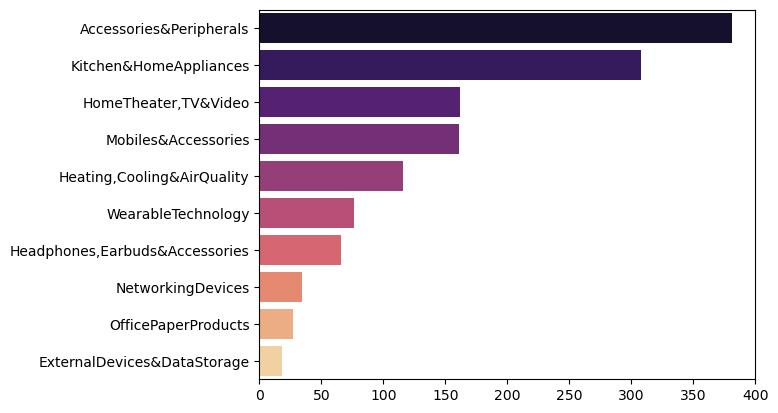

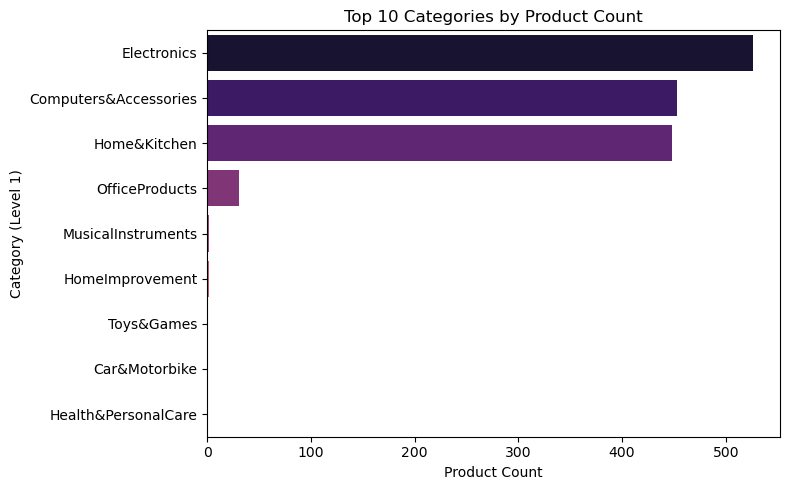

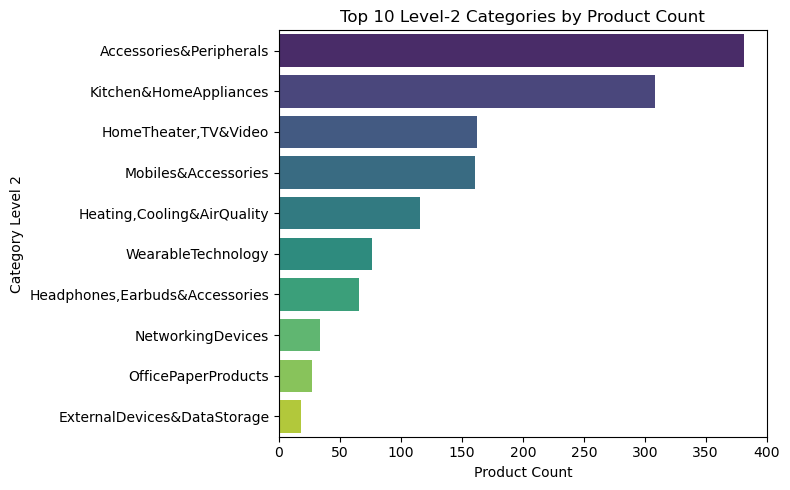

ValueError: Could not interpret input 'category_lvl2'

<Figure size 800x500 with 0 Axes>

In [11]:
# Extract only the first level of category (before the first '|')
df['category_lvl1'] = df['category'].str.split('|').str[0]
splits = df['category'].str.split('|', expand=True)
df['category_lvl2'] = splits[1].fillna(splits[0])

# Compute top 10 categories
top_lvl1 = df['category_lvl1'].value_counts().nlargest(10)
top_lvl2 = df['category_lvl2'].value_counts().nlargest(10)

sns.barplot(x=top_lvl2.values, y=top_lvl2.index, palette="magma")

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_lvl1.values, y=top_lvl1.index, palette="magma")
plt.title("Top 10 Categories by Product Count")
plt.xlabel("Product Count")
plt.ylabel("Category (Level 1)")
plt.tight_layout()
plt.show()

# Plot: Top 10 Level-2 Categories by Product Count
plt.figure(figsize=(8,5))
sns.barplot(x=top_lvl2.values, y=top_lvl2.index, palette="viridis")
plt.title("Top 10 Level-2 Categories by Product Count")
plt.xlabel("Product Count")
plt.ylabel("Category Level 2")
plt.tight_layout()
plt.show()

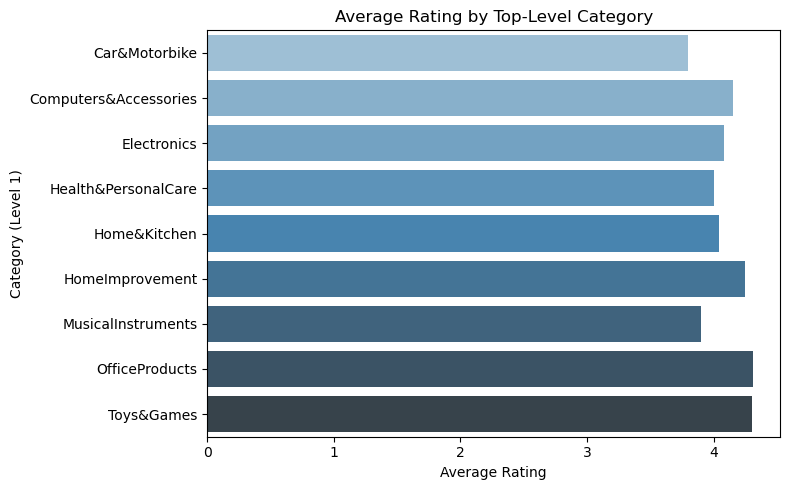

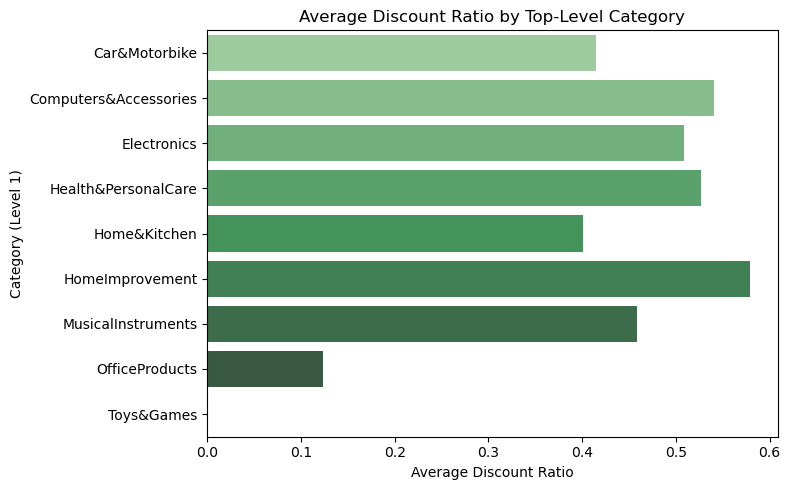

In [4]:
# 1. Group and compute stats for all level-1 categories
all_stats = df.groupby('category_lvl1').agg(
    avg_rating=('rating', 'mean'),
    avg_discount=('discount_ratio', 'mean')
).reset_index()

# 2. Filter down to only the top 10 level-1 categories
stats = all_stats[all_stats['category_lvl1'].isin(top_lvl1.index)]

# 3. Now plot average rating
plt.figure(figsize=(8,5))
sns.barplot(
    x='avg_rating',
    y='category_lvl1',
    data=stats,
    palette="Blues_d"
)
plt.title("Average Rating by Top-Level Category")
plt.xlabel("Average Rating")
plt.ylabel("Category (Level 1)")
plt.tight_layout()
plt.show()

# 4. Plot average discount
plt.figure(figsize=(8,5))
sns.barplot(
    x='avg_discount',
    y='category_lvl1',
    data=stats,
    palette="Greens_d"
)
plt.title("Average Discount Ratio by Top-Level Category")
plt.xlabel("Average Discount Ratio")
plt.ylabel("Category (Level 1)")
plt.tight_layout()
plt.show()

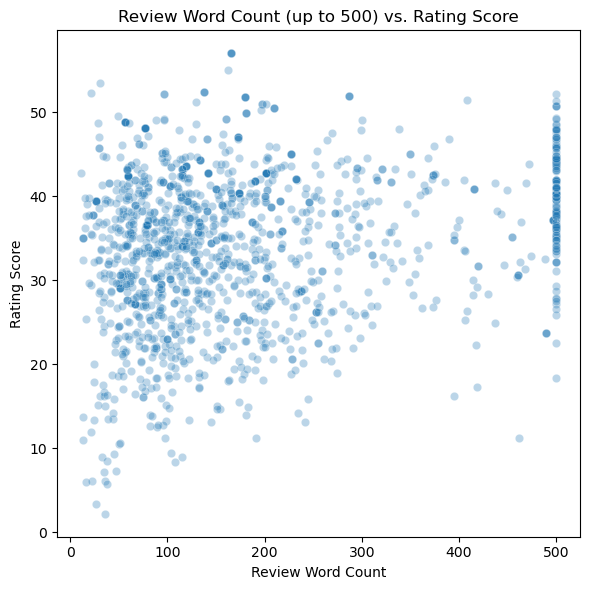

In [5]:
# Scatter plot of review word count (capped at 500) against rating_score
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=df['review_content_word_count'].clip(upper=500),
    y=df['rating_score'],
    alpha=0.3
)
plt.title("Review Word Count (up to 500) vs. Rating Score")
plt.xlabel("Review Word Count")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.show()

In [12]:
# Cell 4: Save updated insights CSV
import os
os.makedirs("data/processed", exist_ok=True)

df.to_csv("data/processed/amazon_insights.csv", index=False)
print("Saved amazon_insights.csv with category_lvl1 and insight columns.")

Saved amazon_insights.csv with category_lvl1 and insight columns.
